In [53]:
import pandas as pd
import numpy as np
df=pd.read_csv("RTA Dataset.csv")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [54]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,Residential areas,NaN,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside-parked vehicles,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,Office areas,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,No defect,Recreational areas,other,NaN,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside objects,2,2,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,No defect,Office areas,other,Tangent road with mild grade and flat terrain,Y Shape,Earth roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,No defect,Industrial areas,other,Tangent road with flat terrain,Y Shape,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [55]:
df.isnull().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

<AxesSubplot: >

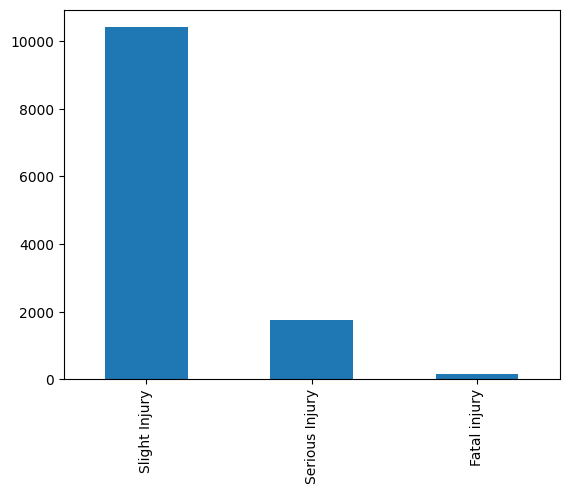

In [56]:
#target variable exploration
df['Accident_severity'].value_counts()
df['Accident_severity'].value_counts().plot(kind='bar')

<AxesSubplot: >

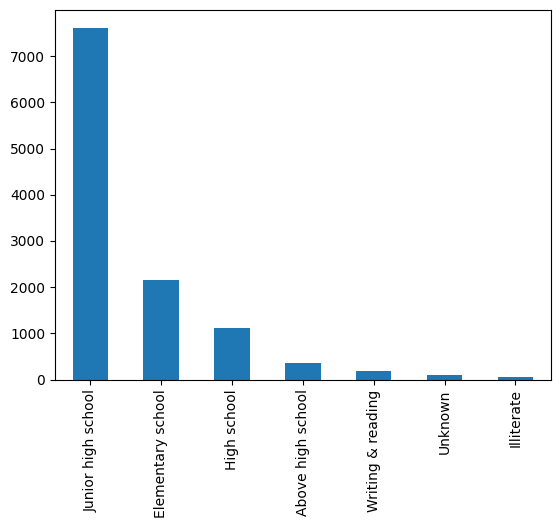

In [57]:
#data visualisation manual
df['Educational_level'].value_counts().plot(kind='bar')


<AxesSubplot: >

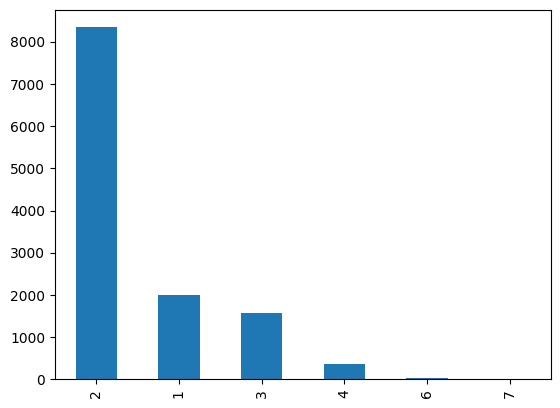

In [58]:
df['Number_of_vehicles_involved'].value_counts().plot(kind='bar')

Target looks like classification
Showing only top 10 of 31 categorical features


[[<Figure size 300x300 with 2 Axes>], None]

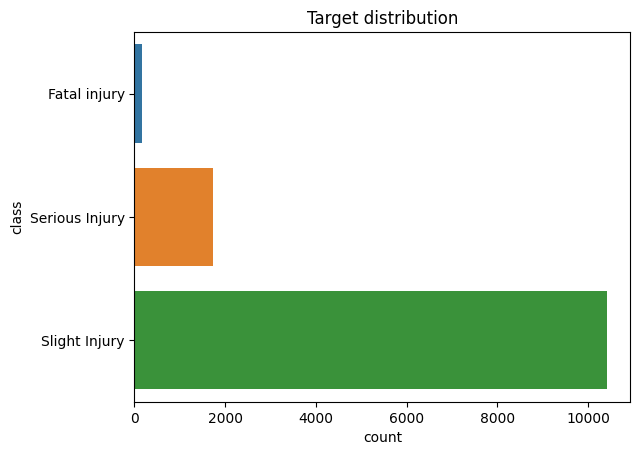

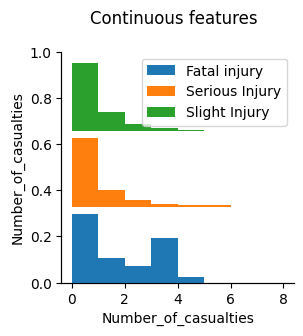

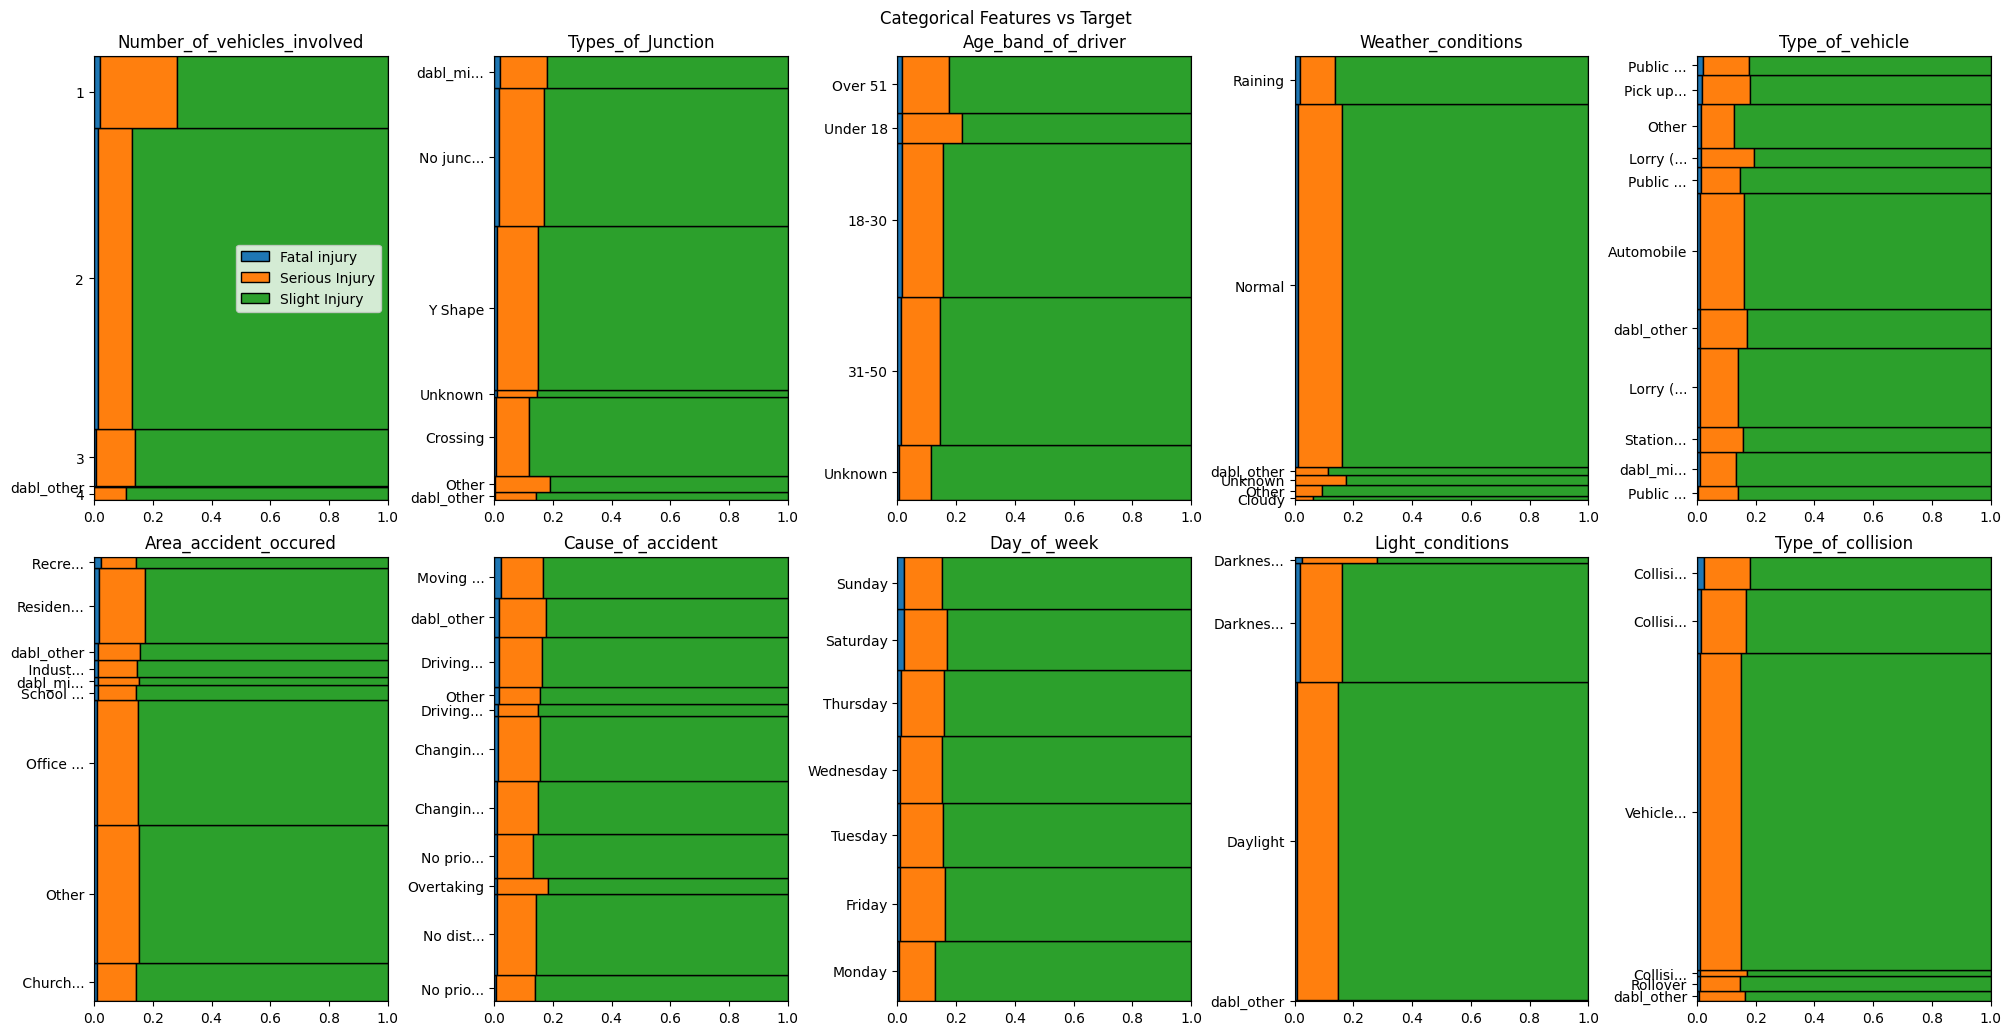

In [59]:
#auto data visualisation using dabl package
import dabl
dabl.plot(df,target_col='Accident_severity',)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

<function matplotlib.pyplot.show(close=None, block=None)>

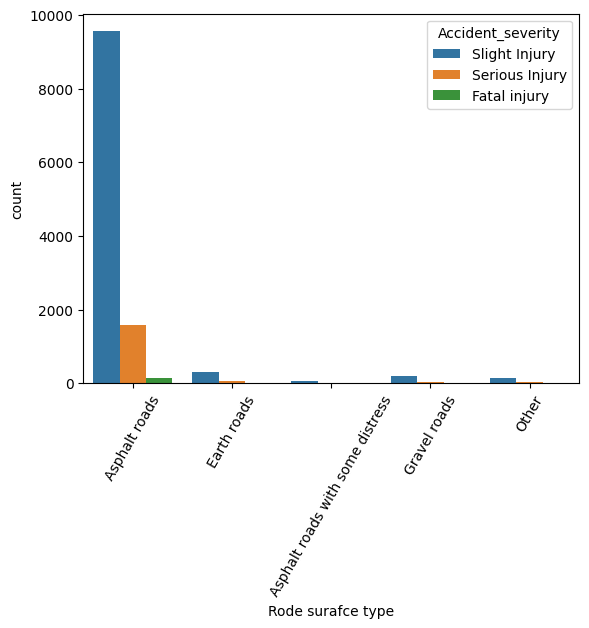

In [61]:
#dabl showing only top 10 categorical variables realtion for rest we need to do manual work
import seaborn as sns
import matplotlib.pyplot as plt

# plt.figure(figCsize=(6,5))
sns.countplot(x='Road_surface_type', hue='Accident_severity', data=df)
plt.xlabel('Rode surafce type')
plt.xticks(rotation=60)
plt.show

In [62]:
#pre processing of data
df['Time']=pd.to_datetime(df['Time'])
#extract feature from data
new_df=df.copy()
new_df['Hour_of_day']=new_df['Time'].dt.hour
new_df=new_df.drop('Time',axis=1)

In [63]:
columns=list(new_df.columns)

In [64]:
#treat missing values
for i in columns:
    new_df[i]=new_df[i].fillna('Unknown')

# features information
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Day_of_week                  12316 non-null  object
 1   Age_band_of_driver           12316 non-null  object
 2   Sex_of_driver                12316 non-null  object
 3   Educational_level            12316 non-null  object
 4   Vehicle_driver_relation      12316 non-null  object
 5   Driving_experience           12316 non-null  object
 6   Type_of_vehicle              12316 non-null  object
 7   Owner_of_vehicle             12316 non-null  object
 8   Service_year_of_vehicle      12316 non-null  object
 9   Defect_of_vehicle            12316 non-null  object
 10  Area_accident_occured        12316 non-null  object
 11  Lanes_or_Medians             12316 non-null  object
 12  Road_allignment              12316 non-null  object
 13  Types_of_Junction            12

In [65]:
#one hot encoding 
# columns.remove('Accident_severity')
X=new_df.drop(['Accident_severity'],axis=1)
y=new_df['Accident_severity']

In [66]:
encoded_df=pd.get_dummies(X,drop_first=True)

In [67]:
encoded_df.head()

,Number_of_vehicles_involved,Number_of_casualties,Hour_of_day,Day_of_week_Monday,Day_of_week_Saturday,Day_of_week_Sunday,Day_of_week_Thursday,Day_of_week_Tuesday,Day_of_week_Wednesday,Age_band_of_driver_31-50,Age_band_of_driver_Over 51,Age_band_of_driver_Under 18,Age_band_of_driver_Unknown,Sex_of_driver_Male,Sex_of_driver_Unknown,Educational_level_Elementary school,Educational_level_High school,Educational_level_Illiterate,Educational_level_Junior high school,Educational_level_Unknown,Educational_level_Writing & reading,Vehicle_driver_relation_Other,Vehicle_driver_relation_Owner,Vehicle_driver_relation_Unknown,Driving_experience_2-5yr,Driving_experience_5-10yr,Driving_experience_Above 10yr,Driving_experience_Below 1yr,Driving_experience_No Licence,Driving_experience_Unknown,Driving_experience_unknown,Type_of_vehicle_Bajaj,Type_of_vehicle_Bicycle,Type_of_vehicle_Long lorry,Type_of_vehicle_Lorry (11?40Q),Type_of_vehicle_Lorry (41?100Q),Type_of_vehicle_Motorcycle,Type_of_vehicle_Other,Type_of_vehicle_Pick up upto 10Q,Type_of_vehicle_Public (12 seats),Type_of_vehicle_Public (13?45 seats),Type_of_vehicle_Public (> 45 seats),Type_of_vehicle_Ridden horse,Type_of_vehicle_Special vehicle,Type_of_vehicle_Stationwagen,Type_of_vehicle_Taxi,Type_of_vehicle_Turbo,Type_of_vehicle_Unknown,Owner_of_vehicle_Organization,Owner_of_vehicle_Other,Owner_of_vehicle_Owner,Owner_of_vehicle_Unknown,Service_year_of_vehicle_2-5yrs,Service_year_of_vehicle_5-10yrs,Service_year_of_vehicle_Above 10yr,Service_year_of_vehicle_Below 1yr,Service_year_of_vehicle_Unknown,Defect_of_vehicle_7,Defect_of_vehicle_No defect,Defect_of_vehicle_Unknown,Area_accident_occured_ Recreational areas,Area_accident_occured_ Church areas,Area_accident_occured_ Hospital areas,Area_accident_occured_ Industrial areas,Area_accident_occured_ Outside rural areas,Area_accident_occured_Office areas,Area_accident_occured_Other,Area_accident_occured_Recreational areas,Area_accident_occured_Residential areas,Area_accident_occured_Rural village areas,Area_accident_occured_Rural village areasOffice areas,Area_accident_occured_School areas,Area_accident_occured_Unknown,Lanes_or_Medians_One way,Lanes_or_Medians_Two-way (divided with broken lines road marking),Lanes_or_Medians_Two-way (divided with solid lines road marking),Lanes_or_Medians_Undivided Two way,Lanes_or_Medians_Unknown,Lanes_or_Medians_other,Road_allignment_Gentle horizontal curve,Road_allignment_Sharp reverse curve,Road_allignment_Steep grade downward with mountainous terrain,Road_allignment_Steep grade upward with mountainous terrain,Road_allignment_Tangent road with flat terrain,Road_allignment_Tangent road with mild grade and flat terrain,Road_allignment_Tangent road with mountainous terrain and,Road_allignment_Tangent road with rolling terrain,Road_allignment_Unknown,Types_of_Junction_No junction,Types_of_Junction_O Shape,Types_of_Junction_Other,Types_of_Junction_T Shape,Types_of_Junction_Unknown,Types_of_Junction_X Shape,Types_of_Junction_Y Shape,Road_surface_type_Asphalt roads with some distress,Road_surface_type_Earth roads,Road_surface_type_Gravel roads,Road_surface_type_Other,Road_surface_type_Unknown,Road_surface_conditions_Flood over 3cm. deep,Road_surface_conditions_Snow,Road_surface_conditions_Wet or damp,Light_conditions_Darkness - lights unlit,Light_conditions_Darkness - no lighting,Light_conditions_Daylight,Weather_conditions_Fog or mist,Weather_conditions_Normal,Weather_conditions_Other,Weather_conditions_Raining,Weather_conditions_Raining and Windy,Weather_conditions_Snow,Weather_conditions_Unknown,Weather_conditions_Windy,Type_of_collision_Collision with pedestrians,Type_of_collision_Collision with roadside objects,Type_of_collision_Collision with roadside-parked vehicles,Type_of_collision_Fall from vehicles,Type_of_collision_Other,Type_of_collision_Rollover,Type_of_collision_Unknown,Type_of_collision_Vehicle with vehicle collision,Type_of_collision_With Train,Vehicle_movement_Getting off,Vehicle_movement_Going str

In [68]:
#label encodeed of target metric
from sklearn.preprocessing import LabelEncoder

lb=LabelEncoder()
lb.fit(y)
y_encoded=lb.transform(y)
y_en=pd.Series(y_encoded)


In [69]:
#feature selection using chi2 stats
from sklearn.feature_selection import SelectKBest,chi2
fs=SelectKBest(chi2,k=50)
X_new= fs.fit_transform(encoded_df,y_en)

#selected features
cols=fs.get_feature_names_out()

#convert selected feature into df
fs_df=pd.DataFrame(X_new,columns=cols)


In [70]:
fs_df.head()

,Number_of_vehicles_involved,Number_of_casualties,Hour_of_day,Day_of_week_Monday,Day_of_week_Saturday,Day_of_week_Sunday,Age_band_of_driver_Over 51,Age_band_of_driver_Under 18,Age_band_of_driver_Unknown,Driving_experience_2-5yr,Driving_experience_Below 1yr,Type_of_vehicle_Long lorry,Type_of_vehicle_Lorry (11?40Q),Type_of_vehicle_Lorry (41?100Q),Type_of_vehicle_Other,Type_of_vehicle_Pick up upto 10Q,Type_of_vehicle_Public (13?45 seats),Area_accident_occured_ Recreational areas,Area_accident_occured_ Hospital areas,Area_accident_occured_ Outside rural areas,Area_accident_occured_Recreational areas,Area_accident_occured_Residential areas,Area_accident_occured_Rural village areas,Area_accident_occured_Rural village areasOffice areas,Lanes_or_Medians_Undivided Two way,Road_allignment_Steep grade upward with mountainous terrain,Road_allignment_Tangent road with mild grade and flat terrain,Types_of_Junction_No junction,Types_of_Junction_Other,Types_of_Junction_Unknown,Road_surface_type_Gravel roads,Road_surface_conditions_Snow,Light_conditions_Darkness - no lighting,Light_conditions_Daylight,Weather_conditions_Other,Weather_conditions_Raining,Weather_conditions_Raining and Windy,Weather_conditions_Unknown,Type_of_collision_Collision with pedestrians,Vehicle_movement_Overtaking,Vehicle_movement_Unknown,Sex_of_casualty_Male,Fitness_of_casuality_Other,Cause_of_accident_Driving to the left,Cause_of_accident_Moving Backward,Cause_of_accident_No distancing,Cause_of_accident_No priority to vehicle,Cause_of_accident_Overspeed,Cause_of_accident_Overtaking,Cause_of_accident_Turnover
0,2,2,17,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,2,2,17,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,2,2,17,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,2,2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,2,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [71]:
# imbalanced treatment using smontec technique. upsampling of data
from imblearn.over_sampling import SMOTENC
n_cat_index=np.array(range(3,50))
smote=SMOTENC(categorical_features=n_cat_index,random_state=42,n_jobs=True)
X_n,y_n=smote.fit_resample(fs_df,y_en)
X_n.shape,y_n.shape

C:\Users\sudee\AppData\Roaming\Python\Python310\site-packages\imblearn\over_sampling\_smote\base.py:572: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
C:\Users\sudee\AppData\Roaming\Python\Python310\site-packages\imblearn\over_sampling\_smote\base.py:336: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


((31245, 50), (31245,))

In [76]:
#build model machine learning
# import the necessary liabrary
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, f1_score

# train and test split and building baseline model to predict target features
X_trn, X_tst, y_trn, y_tst = train_test_split(X_n, y_n, test_size=0.2, random_state=42)

# modelling using random forest baseline
rf = RandomForestClassifier(n_estimators=900, max_depth=80, random_state=42)
rf.fit(X_trn, y_trn)

# predicting on test data
predics = rf.predict(X_tst)

# train score 
rf.score(X_trn, y_trn)

0.9780764922387583

In [77]:
# classification report on test dataset
classif_re = classification_report(y_tst,predics)
print(classif_re)

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2085
           1       0.90      0.86      0.88      2100
           2       0.87      0.90      0.89      2064

    accuracy                           0.91      6249
   macro avg       0.91      0.91      0.91      6249
weighted avg       0.91      0.91      0.91      6249



In [74]:
# f1_score of the model
f1score = f1_score(y_tst,predics, average='weighted')
print(f1score)

0.9151279997749816


In [75]:
#parameter optimisaiton
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import GridSearchCV

# # specify the hyperparameter grid
# param_grid = {
#     'n_estimators': [500, 800,1200],
#     'max_depth': [15, 20,25],
#     'max_features': ['auto', 'sqrt', 'log2']
# }

# # create the random forest classifier
# clf = RandomForestClassifier()

# # create the grid search object
# grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')

# # fit the grid search object to the data
# grid_search.fit(X_trn, y_trn)

# # print the best hyperparameters
# print(grid_search.best_params_)

# # print the best score
# print(grid_search.best_score_)